In [1]:
"""
Intermediate Python Lab package.
"""
__all__ = ["config", "context", "decorators", "generators", "features", "io", "vectorize"]

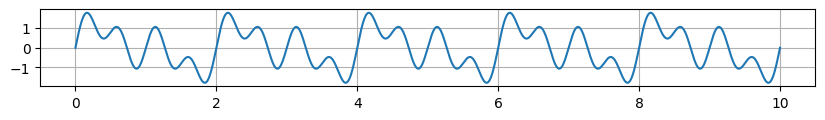

1.7860377341609603


In [20]:
import numpy as np
import matplotlib.pyplot as plt

PI = np.pi

n = 4000
duration = 10.0
noise_level = 0.15

t = np.linspace(0,duration,n) 
frequency = 1
amplitude = 1

sine1 = 0.8 * np.sin(2 * PI * 0.5 * t)
sine2 = 0.8 * np.sin(2 * PI * 1.0 * t)
sine3 = 0.8 * np.sin(2 * PI * 2.0 * t)

sinusoid = sine1 + sine2 + sine3

plt.figure(figsize=(10,1))
plt.plot(t,sinusoid)
plt.grid(True)
plt.show()

print(max(sinusoid))

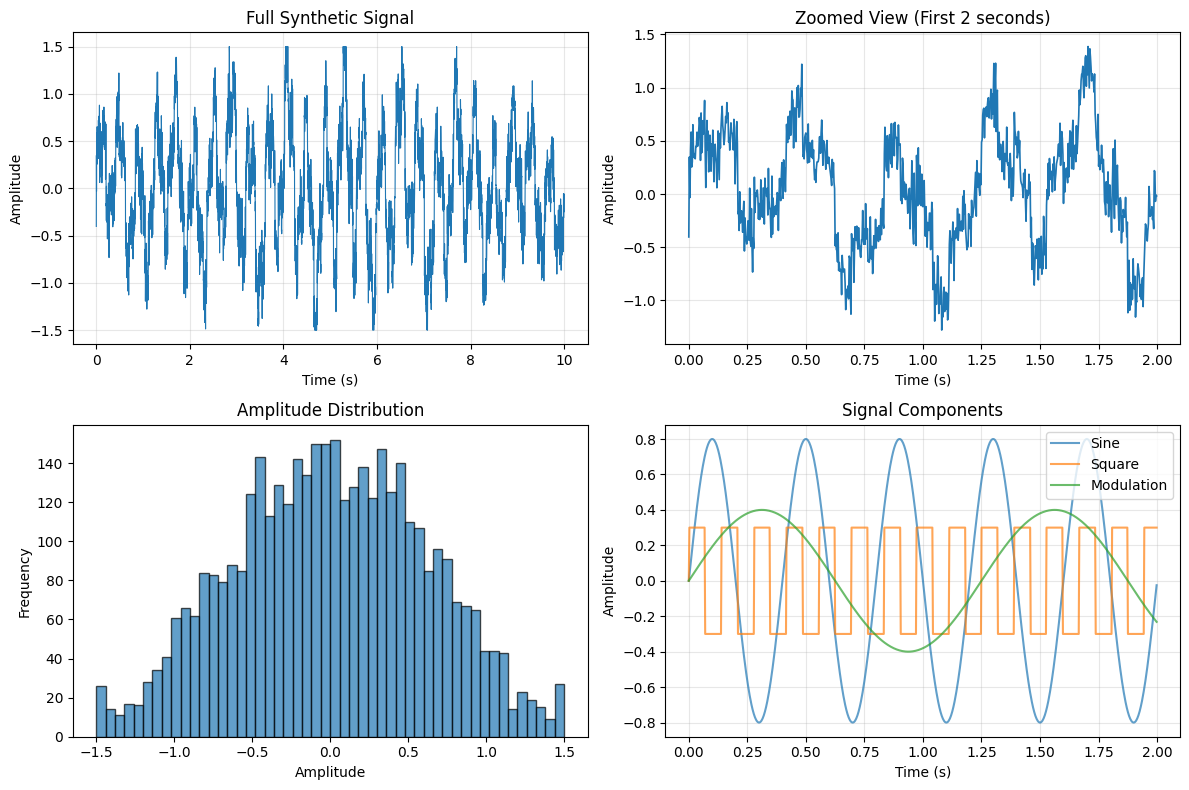

Signal statistics:
  Samples: 4000
  Duration: 10.0s
  Min amplitude: -1.500
  Max amplitude: 1.500
  Mean: 0.003
  Std dev: 0.617


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 4000
duration = 10.0
noise_level = 0.15

# Create time array
t = np.linspace(0, duration, n)

# Generate complex signal (similar to your generate_data function)
# Sine component
sine_component = 0.8 * np.sin(2 * np.pi * 2.5 * t)

# Square component  
square_component = 0.3 * np.sign(np.sin(2 * np.pi * 7.2 * t))

# Modulation
modulation = 0.4 * np.sin(2 * np.pi * 0.8 * t)

# Combine signals
signal = sine_component + square_component + modulation

# Add amplitude envelope
amplitude_envelope = 0.6 + 0.4 * np.sin(2 * np.pi * 0.05 * t)
signal *= amplitude_envelope

# Add noise
signal += noise_level * np.random.randn(n)

# Clip to reasonable bounds
signal = np.clip(signal, -1.5, 1.5)

# Create a comprehensive plot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Full signal
axes[0, 0].plot(t, signal, linewidth=0.8)
axes[0, 0].set_title('Full Synthetic Signal')
axes[0, 0].set_xlabel('Time (s)')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Zoomed-in view (first 2 seconds)
zoom_end = int(2.0 / duration * n)
axes[0, 1].plot(t[:zoom_end], signal[:zoom_end], linewidth=1.2)
axes[0, 1].set_title('Zoomed View (First 2 seconds)')
axes[0, 1].set_xlabel('Time (s)')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Histogram of amplitudes
axes[1, 0].hist(signal, bins=50, alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Amplitude Distribution')
axes[1, 0].set_xlabel('Amplitude')
axes[1, 0].set_ylabel('Frequency')

# Plot 4: Individual components (without noise)
axes[1, 1].plot(t[:zoom_end], sine_component[:zoom_end], label='Sine', alpha=0.7)
axes[1, 1].plot(t[:zoom_end], square_component[:zoom_end], label='Square', alpha=0.7)
axes[1, 1].plot(t[:zoom_end], modulation[:zoom_end], label='Modulation', alpha=0.7)
axes[1, 1].set_title('Signal Components')
axes[1, 1].set_xlabel('Time (s)')
axes[1, 1].set_ylabel('Amplitude')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print signal statistics
print(f"Signal statistics:")
print(f"  Samples: {n}")
print(f"  Duration: {duration}s")
print(f"  Min amplitude: {signal.min():.3f}")
print(f"  Max amplitude: {signal.max():.3f}")
print(f"  Mean: {signal.mean():.3f}")
print(f"  Std dev: {signal.std():.3f}")

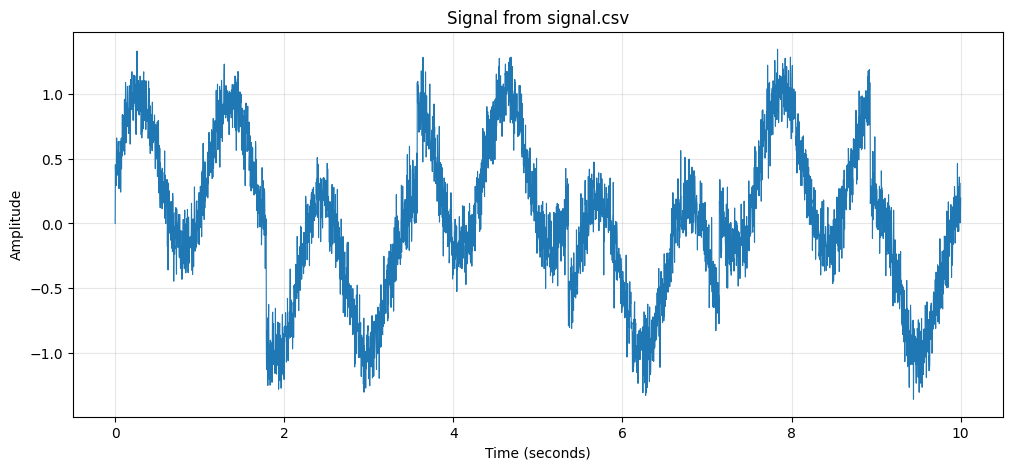

Loaded 4000 samples
Signal range: [-1.361, 1.349]
Mean: 0.033, Std: 0.586


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Method 1: Using numpy (for single-column data like yours)
def plot_signal_basic(csv_path):
    # Read the CSV file
    signal_data = np.loadtxt(csv_path, delimiter=',')
    
    # Create time array (assuming 4000 samples over some duration)
    n_samples = len(signal_data)
    duration = 10.0  # Adjust based on your signal duration
    time = np.linspace(0, duration, n_samples)
    
    # Plot the signal
    plt.figure(figsize=(12, 5))
    plt.plot(time, signal_data, linewidth=0.8)
    plt.title(f'Signal from {csv_path.name}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Print basic statistics
    print(f"Loaded {n_samples} samples")
    print(f"Signal range: [{signal_data.min():.3f}, {signal_data.max():.3f}]")
    print(f"Mean: {signal_data.mean():.3f}, Std: {signal_data.std():.3f}")

# Usage
csv_path = Path(r"C:\Users\acer\Desktop\signal.csv")
plot_signal_basic(csv_path)